# Image Classification #

* Student name: Alejandro Harrison
* Student pace: self paced
* Scheduled project review date/time: February 13th, 11am
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://dev.to/crazyjandro/the-final-stretch-281c

## Business Goal ##

We'll be working with Palomar Medical Center, located in Escondido, California. Initially using a deep neural network, then moving onto a Convolutional Neural Network, we build a model that takes patient X-rays and identifies if the patient has Pneumonia or not. Creating a successful model will help the hospital doctors make a quicker diagnosis by reducing (if not eliminating totally) the time spent on consulting X-rays before meeting with patients. Once proven successful, It may also help to generalize over to other diseases and ailments that are able to be diagnosed via x-ray, such as broken bones and certain types of cancer.


## Data ##

The data comes from a kaggle dataset of chest X-ray images. There are 5,856 images in total, and the data is split into train, test and validation folders. Each folder is further split into folders that contain Pneumonia and non Pneumonia X-rays.

### Starting the Process ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from numpy.random import seed
seed(1)
tf.random.set_seed(123) 

In [2]:
#Create our directory paths to our images
train_data_dir = 'data/train'
test_data_dir = 'data/test'
valid_data_dir = 'data/validation'

In [3]:
#Let's create a function to plot the number of images in each classification directory

def bar_plot(dir):
  x=len(os.listdir(dir+'/NORMAL'))
  y=len(os.listdir(dir+'/PNEUMONIA'))
  category = ['NORMAL', 'PNEUMONIA']
  count = [x, y]
  plot = plt.bar(category,count) 
  plot[0].set_color('orange')
  plt.title('Number of values for each category')
  plt.show()

Training images:

NORMAL: 1341
PNEUMONIA: 3875
Total Training images: 5216
*************************************************


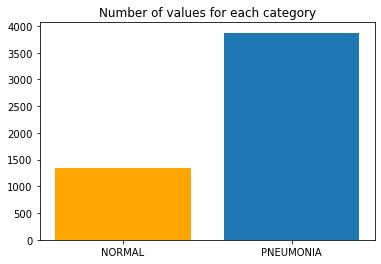

In [4]:
#Let's plot the number of Pneumonia and normal images in our training data
print('Training images:\n')
print('NORMAL:', len(os.listdir(train_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('Total Training images:', len(os.listdir(train_data_dir+'/NORMAL')) + len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(train_data_dir)

**We can see there is an imbalance in our x-ray images, in that there are more Pneumonia x-ray images than normal x-ray images.**

Test images:

NORMAL: 234
PNEUMONIA: 390
Total Test images: 624
*************************************************


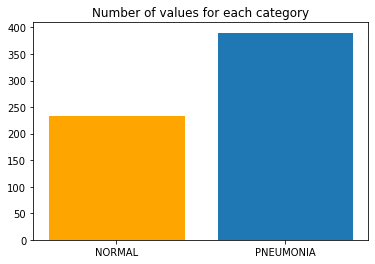

In [5]:
#Let's plot the number of Pneumonia and normal images in our test data
print('Test images:\n')
print('NORMAL:', len(os.listdir(test_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('Total Test images:', len(os.listdir(test_data_dir+'/NORMAL')) + len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(test_data_dir)

Validation images:

NORMAL: 8
PNEUMONIA: 8
Total Validation images: 16
***********************************************


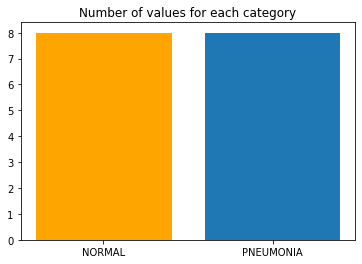

In [6]:
# Let's plot the number of Pneumonia and normal images in our validation data
print('Validation images:\n')
print('NORMAL:', len(os.listdir(valid_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('Total Validation images:', len(os.listdir(valid_data_dir+'/NORMAL')) + len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('*'*47)
bar_plot(valid_data_dir)


In [7]:
# Get all the images in the directory data/train and transform them

train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(200, 200), 
        batch_size=5216)

Found 5216 images belonging to 2 classes.


In [8]:
# Get all the images in the directory data/test and transform them

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(200, 200), 
        batch_size=624)

Found 624 images belonging to 2 classes.


In [9]:
# Get all the images in the directory data/validation and transform them

val_generator = ImageDataGenerator().flow_from_directory(
    valid_data_dir, 
    target_size=(200, 200), 
    batch_size=16)

Found 16 images belonging to 2 classes.


In [10]:
#Create our different data sets

#Training set
X_train, y_train = next(train_generator)

#Test set
X_test, y_test = next(test_generator)

#Validation set
X_val, y_val = next(val_generator)

In [11]:
#Let's look at the shape of our data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(5216, 200, 200, 3)
(5216, 2)
(624, 200, 200, 3)
(624, 2)
(16, 200, 200, 3)
(16, 2)


In [12]:
#let's normalize our data
X_train = X_train / 255
X_test = X_test / 255

#### Let's see a normal x-ray and a pneumonia x-ray ####

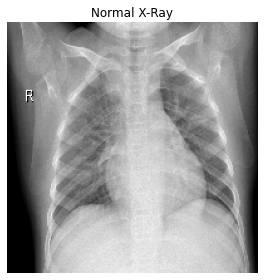

In [13]:
#Display a normal x-ray
plt.imshow((X_train[0]))
plt.axis('off')
plt.title('Normal X-Ray')
plt.tight_layout()
plt.show()

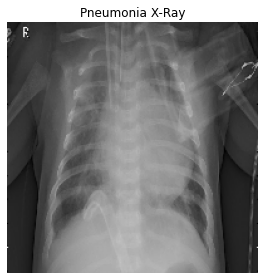

In [14]:
#Display a Pneumonia x-ray|
plt.imshow((X_train[1]))
plt.axis('off')
plt.title('Pneumonia X-Ray')
plt.tight_layout()
plt.show()

### Let's reshape our data ###

In [15]:
#Reshaping our X_train data
X_train_unrow = X_train.reshape(5216, -1)
X_train_unrow.shape

(5216, 120000)

In [16]:
#Reshaping our X_test data
X_test_unrow = X_test.reshape(624, -1)
X_test_unrow.shape

(624, 120000)

In [17]:
#Taking a look at our y_train data
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [18]:
#Let's take a look at which index represents what class
train_generator.class_indices

{'normal': 0, 'pneumonia': 1}

In [19]:
#Transpose our data
y_train_final = y_train.T[[1]]
y_train_final.shape

(1, 5216)

In [20]:
y_train_final = y_train_final.reshape(5216, 1)
y_train_final.shape

(5216, 1)

In [21]:
y_train_final

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [22]:
#Let's reshape our y_test data
y_test_final = y_test.T[[1]]
y_test_final = y_test_final.reshape(624, 1)
y_test_final.shape

(624, 1)

In [23]:
#Reshaping our X_val data
X_val_final = X_val.reshape(16, -1)
X_val_final.shape

(16, 120000)

In [24]:
#Reshaping our y_val data
y_val_final = y_val.T[[1]]
y_val_final = y_val_final.reshape(16,1)
y_val_final.shape

(16, 1)

In [25]:
X_train_final = X_train_unrow
X_test_final = X_test_unrow

In [26]:
#Displaying our final shapes

print(X_train_final.shape)
print(y_train_final.shape)
print(X_test_final.shape)
print(y_test_final.shape)
print(X_val_final.shape)
print(y_val_final.shape)

(5216, 120000)
(5216, 1)
(624, 120000)
(624, 1)
(16, 120000)
(16, 1)


### Building Our Initial Model ###

In [27]:
#Building a model with no hidden layer
model_1 = Sequential()
model_1.add(Dense(50, activation = 'relu', input_shape = (120000,)))
model_1.add(Dense(1, activation = 'sigmoid'))

In [28]:
#Compiling our model
model_1.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [29]:
#Model summary, with layers
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                6000050   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 6,000,101
Trainable params: 6,000,101
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Let's fit our model
results_1 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50 , validation_data= (X_val_final, y_val_final))

Epoch 1/5
105/105 [==============================] - 4s 40ms/step - loss: 0.5977 - acc: 0.7441 - val_loss: 0.5764 - val_acc: 0.6875
Epoch 2/5
105/105 [==============================] - 4s 38ms/step - loss: 0.3790 - acc: 0.8370 - val_loss: 99.8858 - val_acc: 0.6875
Epoch 3/5
105/105 [==============================] - 4s 38ms/step - loss: 0.3341 - acc: 0.8744 - val_loss: 401.5495 - val_acc: 0.5000
Epoch 4/5
105/105 [==============================] - 4s 38ms/step - loss: 0.3214 - acc: 0.8733 - val_loss: 326.7719 - val_acc: 0.5625
Epoch 5/5
105/105 [==============================] - 4s 37ms/step - loss: 0.2602 - acc: 0.9028 - val_loss: 136.7580 - val_acc: 0.7500


In [31]:
#Print out our training accuracy
train_loss, train_acc = model_1.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 2s 15ms/step - loss: 0.1767 - acc: 0.9293
Train Loss: 0.17667123675346375
Train Acc: 0.9292561411857605


In [32]:
#Print out our testing accuracy 
test_loss, test_acc = model_1.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 12ms/step - loss: 0.7077 - acc: 0.7292
Test Loss: 0.7076523900032043
Test Acc: 0.7291666865348816


#### Loss and Accuracy Curves ####

In [33]:
#Function to display our accuracy and loss curves
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    

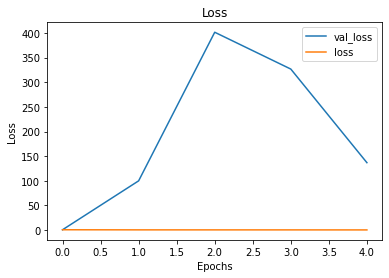

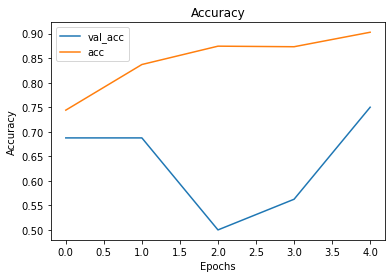

In [34]:
#Display our accuracy and loss curves
visualize_training_results(results_1)

#### From our model we can see: ####
* Our model had a training accuracy of 92%
* Our model had a testing accuracy of 72% 
* Our model is overfitting, which is not surprising for an initial model
* There's no loss occuring for our training model

This suggests our model needs some work, so let's add some more layers and see how that affects the model.

### Model with More Layers ###

In [35]:
#Let's create a model with 3 hidden layers
model_2 = Sequential()
model_2.add(Dense(50, activation = 'relu', input_shape = (120000,)))
model_2.add(Dense(35, activation = 'relu'))
model_2.add(Dense(25, activation = 'relu'))
model_2.add(Dense(15, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [36]:
#Complile our model
model_2.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [37]:
#Model summary with layer descriptions
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                6000050   
_________________________________________________________________
dense_3 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 6,003,141
Trainable params: 6,003,141
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Let's fit our model
results_2 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50, validation_data= (X_val_final, y_val_final))

Epoch 1/5
105/105 [==============================] - 4s 39ms/step - loss: 0.2661 - acc: 0.8980 - val_loss: 24.5072 - val_acc: 0.8750
Epoch 2/5
105/105 [==============================] - 4s 40ms/step - loss: 0.2190 - acc: 0.9164 - val_loss: 81.5419 - val_acc: 0.8125
Epoch 3/5
105/105 [==============================] - 4s 38ms/step - loss: 0.1978 - acc: 0.9248 - val_loss: 1405.1138 - val_acc: 0.5000
Epoch 4/5
105/105 [==============================] - 4s 38ms/step - loss: 0.1847 - acc: 0.9354 - val_loss: 90.1098 - val_acc: 0.8125
Epoch 5/5
105/105 [==============================] - 4s 38ms/step - loss: 0.1720 - acc: 0.9394 - val_loss: 105.9429 - val_acc: 0.8125


In [39]:
#Print out our training accuracy
train_loss, train_acc = model_2.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 2s 14ms/step - loss: 0.6976 - acc: 0.3942
Train Loss: 0.6975898146629333
Train Acc: 0.3941717743873596


In [40]:
#Print out our testing accuracy
test_loss, test_acc = model_2.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 13ms/step - loss: 0.6990 - acc: 0.3462
Test Loss: 0.6990318894386292
Test Acc: 0.3461538553237915


#### Loss and Accuracy Curves ####

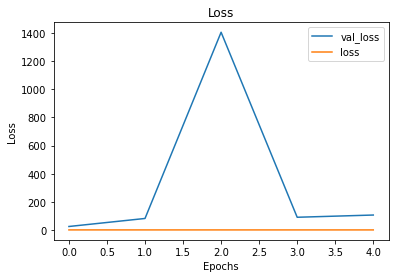

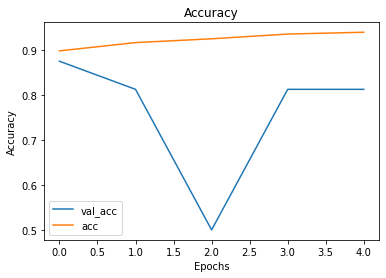

In [41]:
#Display our accuracy and loss curves
visualize_training_results(results_2)

#### From our model we can see: ####
* Our tuned model had a training accuracy of 39% 
* Our model had a testing accuracy of 32%
* We're still overfitting, and our accuracy fell greatly
* There's no loss occuring in our training set still

Let's add some more epochs to see if that has any improvement on our results.

### Model with more epochs ###

In [42]:
#Same model, but we'll increase the number of epochs
model_3 = Sequential()
model_3.add(Dense(50, activation = 'relu', input_shape = (120000,)))
model_3.add(Dense(35, activation = 'relu'))
model_3.add(Dense(25, activation = 'relu'))
model_3.add(Dense(15, activation = 'relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [43]:
#Compile our model
model_3.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [44]:
#Model summary with layer descriptions
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                6000050   
_________________________________________________________________
dense_8 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_9 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 6,003,141
Trainable params: 6,003,141
Non-trainable params: 0
_________________________________________________________________


In [45]:
#Increase the epochs from 5 to 10
results_3 = model_3.fit(X_train_final, y_train_final, epochs = 10, batch_size = 50, validation_data= (X_test_final, y_test_final))

Epoch 1/10
105/105 [==============================] - 5s 44ms/step - loss: 0.6646 - acc: 0.7354 - val_loss: 0.5927 - val_acc: 0.6250
Epoch 2/10
105/105 [==============================] - 4s 40ms/step - loss: 0.4281 - acc: 0.8135 - val_loss: 0.4046 - val_acc: 0.8157
Epoch 3/10
105/105 [==============================] - 4s 40ms/step - loss: 0.3770 - acc: 0.8370 - val_loss: 0.7258 - val_acc: 0.6314
Epoch 4/10
105/105 [==============================] - 4s 40ms/step - loss: 0.2957 - acc: 0.9028 - val_loss: 0.7577 - val_acc: 0.6875
Epoch 5/10
105/105 [==============================] - 5s 43ms/step - loss: 0.2733 - acc: 0.9074 - val_loss: 0.6117 - val_acc: 0.7404
Epoch 6/10
105/105 [==============================] - 4s 41ms/step - loss: 0.2356 - acc: 0.9076 - val_loss: 0.5990 - val_acc: 0.7516
Epoch 7/10
105/105 [==============================] - 4s 41ms/step - loss: 0.2130 - acc: 0.9170 - val_loss: 0.9651 - val_acc: 0.6795
Epoch 8/10
105/105 [==============================] - 4s 40ms/step - 

In [46]:
#Print out our training accuracy
train_loss, train_acc = model_3.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 2s 15ms/step - loss: 0.1620 - acc: 0.9431
Train Loss: 0.16200865805149078
Train Acc: 0.9430598020553589


In [47]:
#Print out our testing accuracy
test_loss, test_acc = model_3.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 12ms/step - loss: 0.4359 - acc: 0.7933
Test Loss: 0.43591514229774475
Test Acc: 0.7932692170143127


#### Loss and Accuracy Curves ####

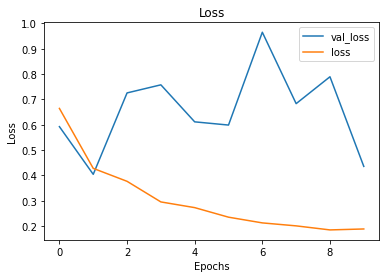

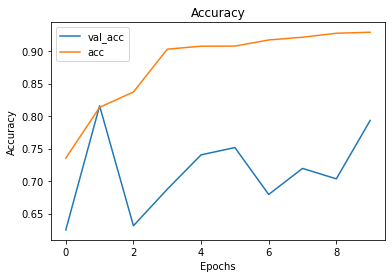

In [48]:
#Display our accuracy and loss curves
visualize_training_results(results_3)

#### From our model we can see: ####
* Our training accuracy is 94%
* Our testing accuracy is 79%
* Our testing accuracy is still lower than our training accuracy, so some overfitting is still going on. 
* We're finally seeing some loss occuring in our training model, which is an improvement compared to before. 

We're seeing slightly better results, but let's add some dropout regularization to see if that helps further decrease overfitting.

### Model with Dropout Regularization ###

In [49]:
#Same model again, but we'll add some dropout regularization

model_4 = Sequential()
model_4.add(Dense(50, activation = 'relu', input_shape = (120000,)))

#Adding dropout regularization
model_4.add(layers.Dropout(0.3))
model_4.add(Dense(35, activation = 'relu'))

model_4.add(layers.Dropout(0.3))
model_4.add(Dense(25, activation = 'relu'))

model_4.add(layers.Dropout(0.3))
model_4.add(Dense(15, activation = 'relu'))

model_4.add(layers.Dropout(0.3))
model_4.add(Dense(1, activation = 'sigmoid'))

#Compile our model
model_4.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [50]:
#Model summary with layer descriptions
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                6000050   
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 35)                1785      
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 25)                900       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 15)               

In [51]:
#Fit our model
results_4 = model_4.fit(X_train_final, y_train_final, epochs = 10, batch_size = 50, validation_data= (X_test_final, y_test_final))

Epoch 1/10
105/105 [==============================] - 5s 43ms/step - loss: 0.6293 - acc: 0.6887 - val_loss: 0.6705 - val_acc: 0.6250
Epoch 2/10
105/105 [==============================] - 4s 41ms/step - loss: 0.5640 - acc: 0.7418 - val_loss: 0.5631 - val_acc: 0.6250
Epoch 3/10
105/105 [==============================] - 4s 41ms/step - loss: 0.5056 - acc: 0.7412 - val_loss: 0.5347 - val_acc: 0.6250
Epoch 4/10
105/105 [==============================] - 4s 42ms/step - loss: 0.4682 - acc: 0.7419 - val_loss: 0.5987 - val_acc: 0.6250
Epoch 5/10
105/105 [==============================] - 4s 41ms/step - loss: 0.4478 - acc: 0.7416 - val_loss: 0.4937 - val_acc: 0.6250
Epoch 6/10
105/105 [==============================] - 4s 41ms/step - loss: 0.5374 - acc: 0.7421 - val_loss: 0.6601 - val_acc: 0.6250
Epoch 7/10
105/105 [==============================] - 4s 41ms/step - loss: 0.4569 - acc: 0.7419 - val_loss: 0.8076 - val_acc: 0.6250
Epoch 8/10
105/105 [==============================] - 4s 43ms/step - 

In [52]:
#Print out our training accuracy
train_loss, train_acc = model_4.evaluate(X_train_final, y_train_final)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 2s 15ms/step - loss: 0.2968 - acc: 0.7429
Train Loss: 0.29682180285453796
Train Acc: 0.7429064512252808


In [53]:
#Print out our testing accuracy
test_loss, test_acc = model_4.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 0s 12ms/step - loss: 0.8079 - acc: 0.6250
Test Loss: 0.8078903555870056
Test Acc: 0.625


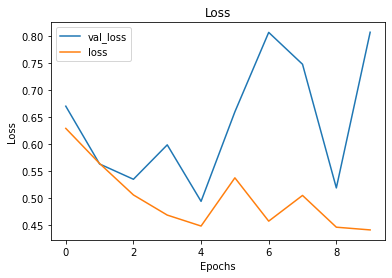

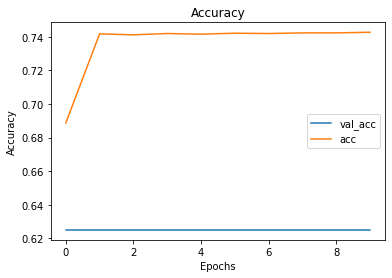

In [54]:
#Display our accuracy and loss curves
visualize_training_results(results_4)

#### From our model we can see: ####
* Our training accuracy is 74%
* Our testing accuracy is 62%
* Our accuracy has fallen again, and we still see overfitting occuring.

Implementing dropout regularization doesn't seem to have helped, and if anything has made things worse. It also seems that our tuning methods aren't drastically improving our model. This could be due to our imbalance of data mentioned earlier, and also the type of model (DNN) that we're using. Let's try a different approach and try using a CNN, while also addressing the imbalance of data.

### Let's Build a CNN ###

In [55]:
# get all the data in the train directory, and transform it
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(100, 100), 
        batch_size = 5216, 
        class_mode='binary')

# get all the data in the test directory, and transform it
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(100, 100), 
        batch_size = 624,
        class_mode='binary') 


# get all the data in the val directory, and transform it
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        valid_data_dir, 
        target_size=(100, 100),
        batch_size = 16,
        class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [56]:
#Create our different data sets
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

**As we saw with our DNN, there was an imbalance within our training data, where there more Pneumonia x-ray images than normal x-ray images. Let's look at the imbalance of our training data again**

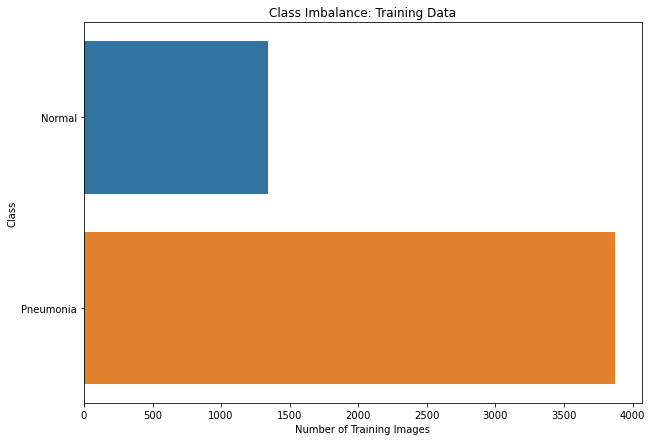

In [57]:
plt.figure(figsize=(10,7))
sns.barplot(x=[sum(y_train==0), sum(y_train==1)],
            y=['Normal', 'Pneumonia'])
                        
plt.title('Class Imbalance: Training Data')
plt.ylabel('Class')
plt.xlabel('Number of Training Images')
plt.show()

In [58]:
#This imbalance can cause all sorts of problems for our model performance
#Let's try and address the imbalance by adding class weights to our model

cls_wt = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = {0: cls_wt[0], 1:cls_wt[1]}


C:\Users\Alejandro\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0. 1.], y=[1. 1. 1. ... 1. 1. 0.] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [59]:
#We'll build an  initial CNN model with 2 convolutional layers, 3 pooling layers, 1 flattening layer and 1 fully connected dense layer

model = models.Sequential()

#Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100,  3)))

#Pooling layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flattening layer
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [60]:
#Model summary with layer descriptions
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)             

In [61]:
#Fit our model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=60,
                    class_weight = class_weights,
                    validation_data=(X_val, y_val))

Epoch 1/20
87/87 [==============================] - 34s 387ms/step - loss: 0.6872 - acc: 0.4881 - val_loss: 0.6851 - val_acc: 0.6250
Epoch 2/20
87/87 [==============================] - 33s 382ms/step - loss: 0.6576 - acc: 0.6346 - val_loss: 0.6687 - val_acc: 0.6250
Epoch 3/20
87/87 [==============================] - 33s 379ms/step - loss: 0.5825 - acc: 0.7092 - val_loss: 0.6452 - val_acc: 0.6250
Epoch 4/20
87/87 [==============================] - 33s 378ms/step - loss: 0.4890 - acc: 0.7778 - val_loss: 0.7198 - val_acc: 0.6250
Epoch 5/20
87/87 [==============================] - 33s 380ms/step - loss: 0.3783 - acc: 0.8388 - val_loss: 0.5972 - val_acc: 0.6250
Epoch 6/20
87/87 [==============================] - 33s 385ms/step - loss: 0.3048 - acc: 0.8725 - val_loss: 0.6992 - val_acc: 0.6250
Epoch 7/20
87/87 [==============================] - 33s 382ms/step - loss: 0.2493 - acc: 0.8955 - val_loss: 0.4472 - val_acc: 0.8125
Epoch 8/20
87/87 [==============================] - 33s 383ms/step - 

In [62]:
#Print out our training accuracy
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 7s 40ms/step - loss: 0.0915 - acc: 0.9672
Train Loss: 0.09151110798120499
Train Acc: 0.9672162532806396


In [63]:
#Print out our testing accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 1s 37ms/step - loss: 0.0808 - acc: 0.9712
Test Loss: 0.08082673698663712
Test Acc: 0.9711538553237915


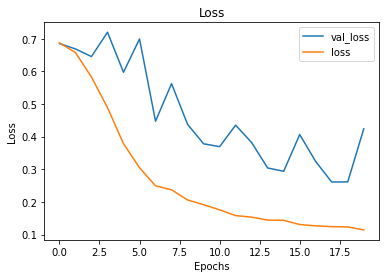

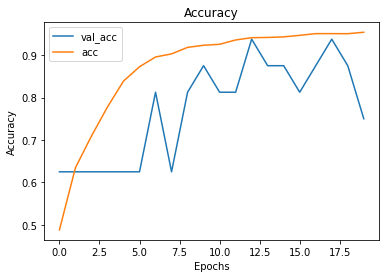

In [64]:
#Display our accuracy and loss curves
visualize_training_results(history)

In [65]:
#We want to look at other metrics in addition to accuracy like recall
#We also want to see our rates of false positives, false negatives, true positives, and true negatives
#Let's create a function to print out a confusion matrix and a classification report

def evaluation_metrics(results, y_test = y_test):
    predictions = results.model.predict(X_test)
    y_pred = (predictions > 0.5)
    
    confuse_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(confuse_matrix, annot=True, cmap='Blues', fmt='0.5g')
    plt.xlabel('Predictions');
    plt.ylabel('Actuals');

    cr = classification_report(y_test, y_pred)
    print(cr)

    


              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       172
         1.0       0.97      0.99      0.98       452

    accuracy                           0.97       624
   macro avg       0.97      0.96      0.96       624
weighted avg       0.97      0.97      0.97       624



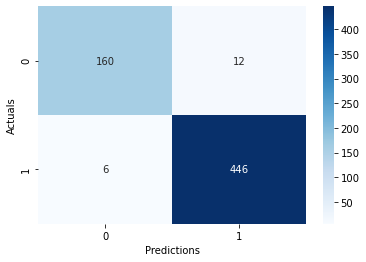

In [66]:
#Display our classification report and confusion matrix
evaluation_metrics(history)

Our training accuracy is higher than our testing accuracy, signifying overfitting but significantly less so when compared to our DNN models. We also immediately see training loss occuring in our initial model, which we did not see in our initial DNN model.  Our initial results look promising, so let's try adding some dropout regularization to see if we can improve our model.

**Let's take a look at our classification report results:** 

For our test model class 1 (meaning a chest x-ray is classified as Pneumonia) we have a precision score of .97, a recall score of .99, and an f1 score of .98, meaning:

* Out of all the x-rays that the model classified as Pneumonia, 97% were actually Pneumonia.
* Out of all the x-rays that were Pneumonia x-rays, the model correctly predicted 99% of them
* Our model has a high f1 score, indicating incredible performance on classifying x-ray images as Pneumonia.

**Let's take a look at our confusion matrix results:**
* 160 x-rays were correctly classified as being normal x-rays
* 6 x-rays were wrongly classified as not being Pneumonia x-rays
* 12 x-rays were wrongly classified as being Pneumonia x-rays
* 446 x-rays were correctly classified as being Pneumonia x-rays

**There seems to be some slight overfitting occuring, indicated by the closeness of our accuracy scores, and the near perfect recall score. Let's try adding some dropout regularization to see if that helps with our overfitting issue.**

### Let's add dropout regularization ###

In [67]:
#Same model, but with dropout regularization
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100,  3)))

model2.add(layers.MaxPooling2D((2, 2)))


model2.add(Dropout(0.4))
model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(Dropout(0.4))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))


model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [68]:
#Model summary with layer descriptions
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)       

In [69]:
#Fitting our model
history = model2.fit(X_train, y_train,
                    epochs=20,
                    batch_size=60,
                    class_weight = class_weights,
                    validation_data=(X_val, y_val))

Epoch 1/20
87/87 [==============================] - 39s 444ms/step - loss: 0.6534 - acc: 0.6296 - val_loss: 0.6860 - val_acc: 0.5000
Epoch 2/20
87/87 [==============================] - 38s 433ms/step - loss: 0.5634 - acc: 0.7132 - val_loss: 0.6589 - val_acc: 0.6250
Epoch 3/20
87/87 [==============================] - 38s 435ms/step - loss: 0.4528 - acc: 0.7857 - val_loss: 0.6165 - val_acc: 0.6250
Epoch 4/20
87/87 [==============================] - 38s 435ms/step - loss: 0.3605 - acc: 0.8436 - val_loss: 0.5944 - val_acc: 0.6250
Epoch 5/20
87/87 [==============================] - 40s 457ms/step - loss: 0.2967 - acc: 0.8683 - val_loss: 0.5587 - val_acc: 0.7500
Epoch 6/20
87/87 [==============================] - 38s 435ms/step - loss: 0.2655 - acc: 0.8875 - val_loss: 0.5265 - val_acc: 0.6875
Epoch 7/20
87/87 [==============================] - 38s 433ms/step - loss: 0.2330 - acc: 0.9007 - val_loss: 0.4861 - val_acc: 0.8125
Epoch 8/20
87/87 [==============================] - 38s 436ms/step - 

In [70]:
#Print out our training accuracy
train_loss, train_acc = model2.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 7s 40ms/step - loss: 0.1834 - acc: 0.9465
Train Loss: 0.18339040875434875
Train Acc: 0.9465107321739197


In [71]:
#Print out our testing accuracy
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 1s 38ms/step - loss: 0.1780 - acc: 0.9503
Test Loss: 0.1780313402414322
Test Acc: 0.9503205418586731


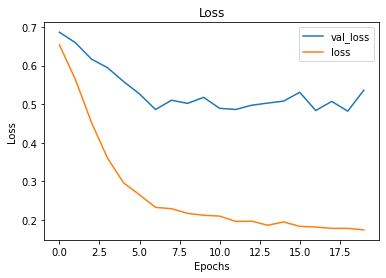

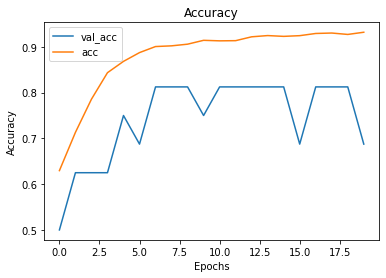

In [72]:
#Display our accuracy and loss curves
visualize_training_results(history)

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       172
         1.0       0.97      0.96      0.97       452

    accuracy                           0.95       624
   macro avg       0.93      0.94      0.94       624
weighted avg       0.95      0.95      0.95       624



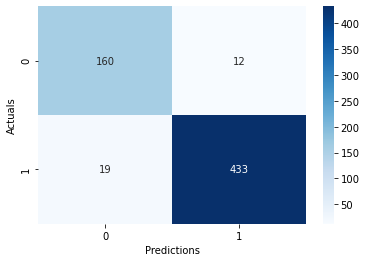

In [73]:
#Display our classification report and confusion matrix
evaluation_metrics(history)

Our training and testing accuracy are now the same, which is an improvement. Our training and testing loss are also extremely close in value. However our validation accuracy is still relatively low. Let's see what happens if we decrease the number of epochs to around 10.

**Let's take a look at our classification report results:** 

For our test model class 1 (meaning a chest x-ray is classified as Pneumonia) we have a precision score of .97, a recall score of .96, and an f1 score of .97, meaning:

* Out of all the x-rays that the model classified as Pneumonia, 97% were actually Pneumonia.
* Out of all the x-rays that were Pneumonia x-rays, the model correctly predicted 96% of them
* Our model has a high f1 score, indicating incredible performance on classifying x-ray images as Pneumonia.

**Let's take a look at our confusion matrix results:**
* 160 x-rays were correctly classified as being normal x-rays
* 19 x-rays were wrongly classified as not being Pneumonia x-rays
* 12 x-rays were wrongly classified as being Pneumonia x-rays
* 433 x-rays were correctly classified as being Pneumonia x-rays

**It still seems like our model is overfitting, as evidenced by our similar testing and training accuracy scores, as well as our still somewhat high recall score. Let's decrease the number of epochs from 20 to 10, to see if that has an effect on our model.**

### Let's decrease the number of epochs to 10 ###

In [74]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100,  3)))

model3.add(layers.MaxPooling2D((2, 2)))


model3.add(Dropout(0.4))
model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(Dropout(0.4))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))


model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [75]:
#Model summary with layer descriptions
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)       

In [76]:
#Fitting the model and decreasing the number of epochs to 10
history = model3.fit(X_train, y_train,
                    epochs=10,
                    batch_size=60,
                    class_weight = class_weights,
                    validation_data=(X_val, y_val))

Epoch 1/10
87/87 [==============================] - 38s 439ms/step - loss: 0.6610 - acc: 0.5834 - val_loss: 0.6711 - val_acc: 0.5000
Epoch 2/10
87/87 [==============================] - 38s 433ms/step - loss: 0.5763 - acc: 0.7097 - val_loss: 0.6510 - val_acc: 0.6250
Epoch 3/10
87/87 [==============================] - 38s 439ms/step - loss: 0.4733 - acc: 0.7803 - val_loss: 0.6130 - val_acc: 0.6250
Epoch 4/10
87/87 [==============================] - 38s 440ms/step - loss: 0.3717 - acc: 0.8413 - val_loss: 0.6276 - val_acc: 0.6250
Epoch 5/10
87/87 [==============================] - 40s 465ms/step - loss: 0.3036 - acc: 0.8691 - val_loss: 0.5691 - val_acc: 0.5625
Epoch 6/10
87/87 [==============================] - 39s 449ms/step - loss: 0.2690 - acc: 0.8844 - val_loss: 0.5132 - val_acc: 0.7500
Epoch 7/10
87/87 [==============================] - 41s 467ms/step - loss: 0.2348 - acc: 0.9013 - val_loss: 0.4891 - val_acc: 0.8750
Epoch 8/10
87/87 [==============================] - 41s 476ms/step - 

In [77]:
#Print out our training accuracy
train_loss, train_acc = model3.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Acc: {train_acc}')

163/163 [==============================] - 7s 40ms/step - loss: 0.3358 - acc: 0.8668
Train Loss: 0.33575859665870667
Train Acc: 0.8667561411857605


In [78]:
#Print out our testing accuracy
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Acc: {test_acc}')

20/20 [==============================] - 1s 37ms/step - loss: 0.3260 - acc: 0.8830
Test Loss: 0.32599201798439026
Test Acc: 0.8830128312110901


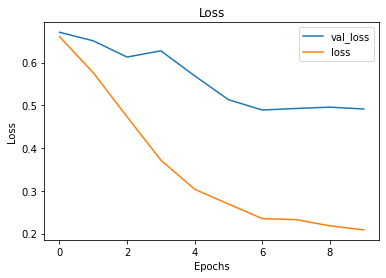

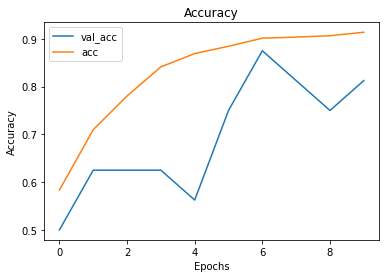

In [79]:
#Display our accuracy and loss curves
visualize_training_results(history)

              precision    recall  f1-score   support

         0.0       0.71      0.98      0.82       172
         1.0       0.99      0.85      0.91       452

    accuracy                           0.88       624
   macro avg       0.85      0.91      0.87       624
weighted avg       0.91      0.88      0.89       624



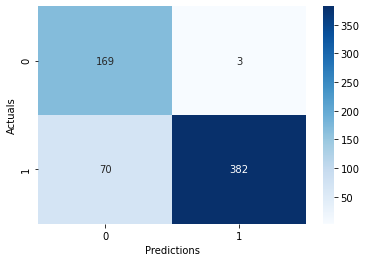

In [80]:
#Display our classification report and confusion matrix
evaluation_metrics(history)

For the first time, our testing accuracy is higher than our training accuracy. Our validation accuracy is also the highest it has been during our tuning. This is significant improvement from our initial DNN and CNN model, so let's move on to our conclusion.

**Let's take a look at our classification report results:** 

For our test model class 1 (meaning a chest x-ray is classified as Pneumonia) we have a precision score of .99, a recall score of .85, and an f1 score of .91, meaning:

* Out of all the x-rays that the model classified as Pneumonia, 99% were actually Pneumonia.
* Out of all the x-rays that were Pneumonia x-rays, the model correctly predicted 85% of them
* Our model has a high f1 score, indicating great performance on classifying x-ray images as Pneumonia.

**Let's take a look at our confusion matrix results:**
* 169 x-rays were correctly classified as being normal x-rays
* 70 x-rays were wrongly classified as not being Pneumonia x-rays
* 3 x-rays were wrongly classified as being Pneumonia x-rays
* 382 x-rays were correctly classified as being Pneumonia x-rays

## Conclusion ##

Our goal was to work with Palomar Medical Center to build an image classification model that takes patient X-rays and identifies if the patient has Pneumonia or not. This will help the hospital doctors make a quicker diagnosis, and reduce the time spent on consulting X-rays before meeting with patients. We initially used a deep neural network, then moved onto a Convolutional Neural 
Network. 

Our initial deep neural network had 0 hidden layers, and after running we found it was overfitting. Our model had a testing accuracy of about 92% and a testing accuracy of 72%. For the next model, we added more layers, and after running it found that while accuracy dramatically dropped, it was still overfitting. It had a training accuracy of about 39% and a testing accuracy of about 34%. Next, we added more epochs to see if that would have an impact on our accuracy and overfitting issue. We found that we still had an overfitting issue, but our accuracy improved again, with our training accuracy at about 94%, and our testing accuracy at 79%. Lastly, we implemented dropout regularization, to see if that would reduce overfitting. Our training accuracy was 74%, while our testing accuracy was about 62%, so overfitting was still an issue. We then decided to switch over to a CNN.

Our initial CNN model had 2 convolutional layers, 3 pooling layers, 1 flattening layer and 1 fully connected dense layer. Our initial training accuracy was about 95% and our testing accuracy was about 94%. This along with our loss and accuracy curves sugested overfitting still. Next we implemented dropout regularization before doing anything else to see if our overfitting would be addressed. Our curves improved slightly, and our testing and training accuracy were both at about 94%. Lastly, we decreased the number of epochs from 20 to 10. Here, we saw the most improvement, not only in our curves but also in our accuracy values. Our final training accuracy was about 90%, and our final testing accuracy was about 91%. 

Our model accuracy overall improved greatly when switching from a deep neural network to a CNN. At it's lowest, our deep neural network had a testing accuracy of about 34%, and at its highest it was about 79%. In comparison, our CNN had at its lowest a testing accuracy of about 91%, and at its highest 94%. Our model is still slightly overfitting, but compared to previous models, we were able to reduce it somewhat through Dropout Regularization and reducing the number of epochs. 